In [28]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn
import logomaker

import sys
sys.path.append("../")
from model import NaiveModelV2

Matplotlib is building the font cache; this may take a moment.


In [35]:
model = NaiveModelV2(4)
model_weight = torch.load("/binf-isilon/renniegrp/vpx267/ucph_thesis/data/outputs/models/trained_model_1th_fold_control_m6_info-no_promoter-False_single_model.pkl")
model.load_state_dict(model_weight)
model.eval()

NaiveModelV2(
  (NaiveCNN): Sequential(
    (0): Conv1d(4, 8, kernel_size=(7,), stride=(2,))
    (1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Conv1d(8, 32, kernel_size=(3,), stride=(1,), padding=(1,))
    (5): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Dropout(p=0.2, inplace=False)
    (9): Conv1d(32, 128, kernel_size=(3,), stride=(1,), padding=(1,))
    (10): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
  )
  (biiLSTM): LSTM(128, 128, num_layers=3, batch_first=True, bidirectional=True)
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC1): Sequential(
    (0): Linear(in_features=63744, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_

In [70]:
for k, v in model_weight.items():
    print(k)

NaiveCNN.0.weight
NaiveCNN.0.bias
NaiveCNN.1.weight
NaiveCNN.1.bias
NaiveCNN.1.running_mean
NaiveCNN.1.running_var
NaiveCNN.1.num_batches_tracked
NaiveCNN.4.weight
NaiveCNN.4.bias
NaiveCNN.5.weight
NaiveCNN.5.bias
NaiveCNN.5.running_mean
NaiveCNN.5.running_var
NaiveCNN.5.num_batches_tracked
NaiveCNN.9.weight
NaiveCNN.9.bias
NaiveCNN.10.weight
NaiveCNN.10.bias
NaiveCNN.10.running_mean
NaiveCNN.10.running_var
NaiveCNN.10.num_batches_tracked
biiLSTM.weight_ih_l0
biiLSTM.weight_hh_l0
biiLSTM.bias_ih_l0
biiLSTM.bias_hh_l0
biiLSTM.weight_ih_l0_reverse
biiLSTM.weight_hh_l0_reverse
biiLSTM.bias_ih_l0_reverse
biiLSTM.bias_hh_l0_reverse
biiLSTM.weight_ih_l1
biiLSTM.weight_hh_l1
biiLSTM.bias_ih_l1
biiLSTM.bias_hh_l1
biiLSTM.weight_ih_l1_reverse
biiLSTM.weight_hh_l1_reverse
biiLSTM.bias_ih_l1_reverse
biiLSTM.bias_hh_l1_reverse
biiLSTM.weight_ih_l2
biiLSTM.weight_hh_l2
biiLSTM.bias_ih_l2
biiLSTM.bias_hh_l2
biiLSTM.weight_ih_l2_reverse
biiLSTM.weight_hh_l2_reverse
biiLSTM.bias_ih_l2_reverse
biiLSTM.

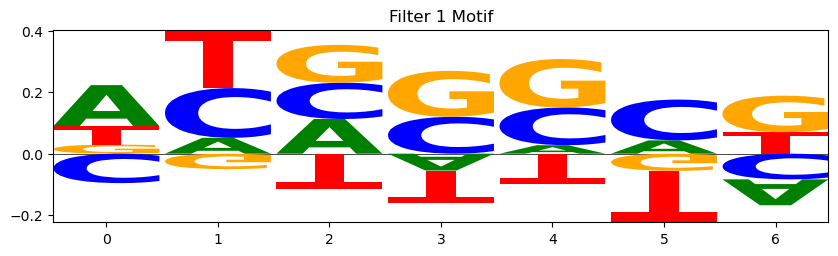

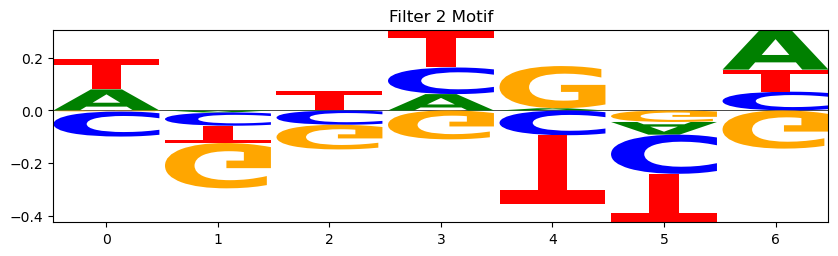

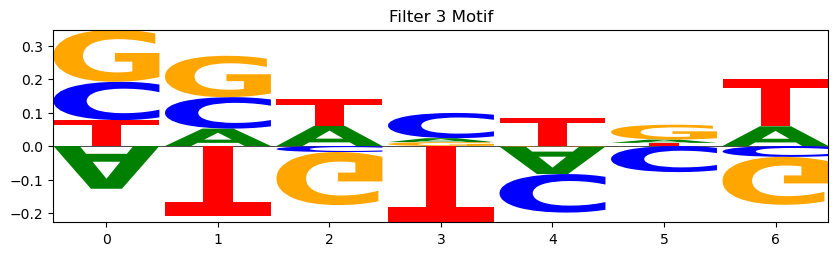

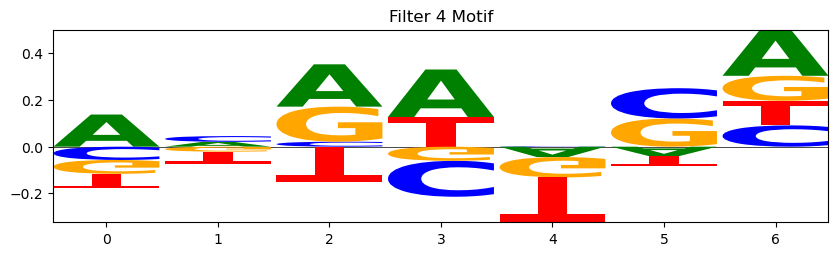

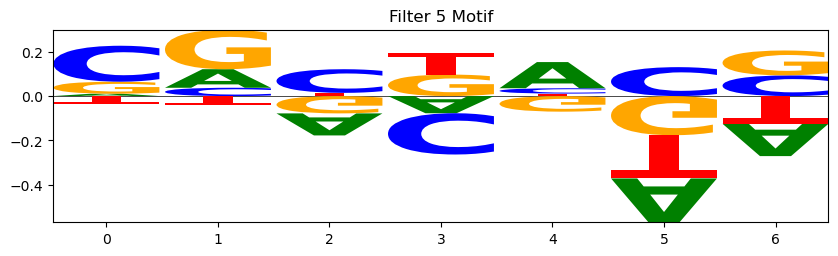

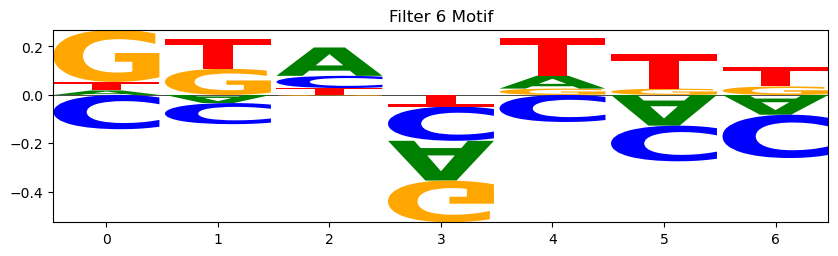

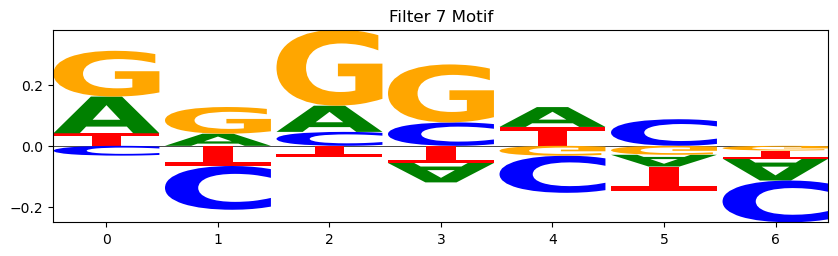

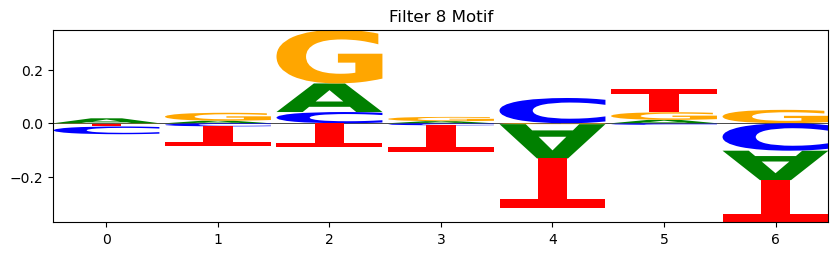

In [72]:
#torch.Size([8, 4, 7])
first_layer = model_weight['NaiveCNN.0.weight'].cpu()
for i, filter_weight in enumerate(first_layer):
    pwm = pd.DataFrame(filter_weight.numpy().T, columns=["A", "C", "G", "T"])
    logomaker.Logo(pwm)
    plt.title(f"Filter {i+1} Motif")
    plt.show()

In [69]:
print(first_layer[7])
print(pd.DataFrame(first_layer[7].numpy().T, columns=["A", "C", "G", "T"]))

tensor([[ 0.0185,  0.0095,  0.1067,  0.0078, -0.1279,  0.0128, -0.1099],
        [-0.0289, -0.0117,  0.0420, -0.0077,  0.0944, -0.0060, -0.1024],
        [-0.0011,  0.0297,  0.2003,  0.0159, -0.0033,  0.0284,  0.0501],
        [-0.0109, -0.0739, -0.0896, -0.1009, -0.1860,  0.0866, -0.1574]])
          A         C         G         T
0  0.018480 -0.028931 -0.001081 -0.010898
1  0.009528 -0.011679  0.029667 -0.073879
2  0.106737  0.041971  0.200303 -0.089557
3  0.007832 -0.007707  0.015927 -0.100860
4 -0.127914  0.094366 -0.003304 -0.185977
5  0.012804 -0.006009  0.028370  0.086627
6 -0.109862 -0.102381  0.050138 -0.157402


<Axes: xlabel='True Val', ylabel='Pred Val'>

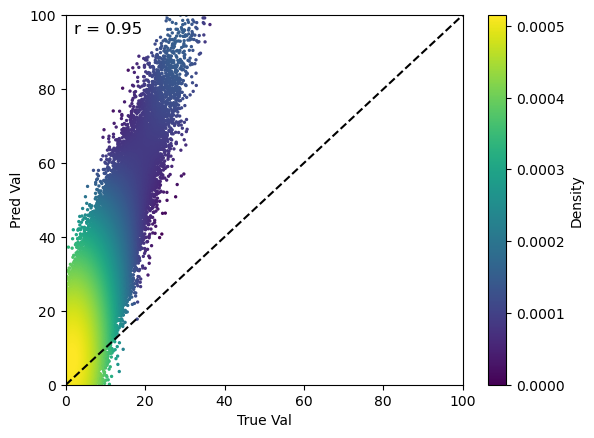

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

def density_scatter(x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    # Create a jointplot with scatterplot and histograms
    if np.max(x) > 1 and np.max(y) > 1:
        max = 100
    else:
        max = 1

    corr_coef = np.corrcoef(x, y)[0, 1]
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z, s=2, **kwargs )

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')
    ax.plot([0, max], [0, max], 'k--')
    ax.set_xlabel('True Val')
    ax.set_ylabel('Pred Val')
    ax.set_xlim(0, max)
    ax.set_ylim(0, max)
    # Add correlation coefficient text
    ax.text(2, 95, f'r = {corr_coef:.2f}', fontsize=12)
    return ax

x = np.random.normal(size=100000)
y = x * 3 + np.random.normal(size=100000)
density_scatter( x*10, y*10, bins = [5,5] )

In [25]:
palette = iter(sns.color_palette("magma", 5))

In [27]:
next(palette)

(0.171713, 0.067305, 0.370771)